# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


### <font color="red">Exercise 06.1: simulation of 1D Ising model <font>

In this notebook we will show the results of our simulation of a 1D Ising model. We started from a partial C++ code that has been given to us with the assignment of completing it.

### Analytic solution

Since the one-dimensional (1D) Ising Model with nearest neighbors is exactly resoluble, we decide to first write down the analytic solutions formulas and then represent them togheter with our simulated results.

A usual 1D Ising model has an hamiltonian like:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-h\sum_{i=1}^N s_i 
$$

with $\{ s_i \}=\pm 1$ are spin variables and, wanting to describe the ferromagnetic model, it is $J>0$.

The exact resolution of the model exploits periodic boundary conditions and starts from writing the hamiltonian of a system with N spins as:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

The usual sum $\sum_{i=1}^N s_i$ can be replaced with $\frac{1}{2}\sum_{i=1}^N (s_i + s_{i+1})$ since the periodic boundary conditions impose $s_{N+1}=s_1$.

Then the partition function $Z$ can be computed by using the transfer matrix $P=\left( \begin{array}{cc} e^{\beta\left( J + h\right)} & e^{-\beta J} \\e^{-\beta J} & e^{\beta\left( J - h\right)} \end{array}\right)$.

By performing the explicit calculation it turns out that: $Z=Tr\left( P^N\right)$

So $Z$ is the sum of the eigenvalues of the $P$ matrix elevated to Nth power, namely:

$$
Z= \lambda_1^N + \lambda_2^N
$$

Being $\lambda_{1,2} = e^{\beta J} \cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$.

### Physical quantities of interest

__NB__: in the following we will assume units such that $\mu_B=1$ and $k_B=1$.

Once the partition function has been computed, all the thermodynamic quantities of interest are just a matter of calculations, in particular derivatives. 

The first physical quantity needed is the Helmholtz free energy, $A = -k_B T \ln Z$. After that we will compute:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

However, another formula will be useful later, it holds in general and is a kind of fluctuation-dissipation relation:

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}=k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

- The **magnetization** (with $h \not= 0$):

From $M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \dfrac{\partial \ln Z}{\partial h}$ we derive the exact formula:

$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

Anyhow there is another formula that will become useful later; the magnetization is simply the mean value of the spin values of the system:

$$
M(N,T,h) =  \left\langle \sum_{i=1,N}s_i \right\rangle
$$

Note that with $h=0$ it is trivially $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a ferromagnetic phase transition in absence of an external magnetic field.

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

Finally, we can also write this quantity using a kind of fluctuation-dissipation relation:

$$
\chi(N,T) = \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right]
$$

In the case of $h=0$, since $M=\langle \sum_{i=1,N}s_i \rangle=0$, then the formula is easier: $\chi(N,T) = \beta \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

e = -J*( th + ch*thN )/( 1 + thN ) #Internal energy

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2) #Heat capacity

h=0.02 #external field
l1 = np.exp(beta*J)*np.cosh(beta*h)+np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
l2 = np.exp(beta*J)*np.cosh(beta*h)-np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))
Z = l1**Ns + l2**Ns
#Magnetization
M = (np.exp(beta*J)*np.sinh(beta*h)*((l1**(Ns-1))*(1+np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J))) 
        + (l2**(Ns-1))*(1-np.exp(beta*J)*np.cosh(beta*h)/np.sqrt(np.exp(2*beta*J)*np.cosh(beta*h)*np.cosh(beta*h)-2*np.sinh(2*beta*J)))))/(Z)

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)#Susceptibility

### Numerical evaluation

In order to produce these data we firstly completed the 1D Ising C++ code with both the Metropolis sampling algorithm and the Gibbs sampling algorithm. Then we also added the possibility to restart from a previous spin configuration.

Our improved code is able to compute $U(N,T)$, $C(N,T)$, $\chi(N,T)$ and $M(N,T,h)$ (of which only the first computation was already implemented).

So we are asked to compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As always we use data blocking to calculate uncertainties; we choose to use $10000$ Monte-Carlo steps per block, being a Monte Carlo step the trying to flip one time all the spins of the system.

Our numerical results for the quantities $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ are then represented and compared with the exact curves.

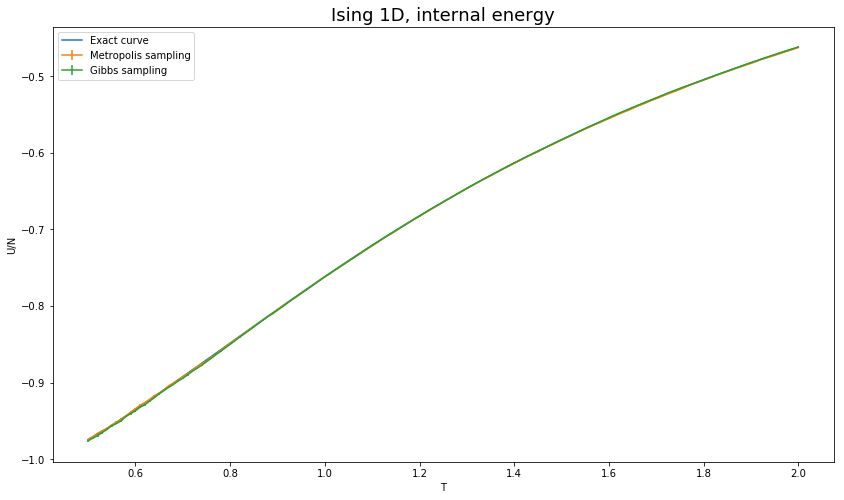

In [2]:
temp_met, intern_energy_met, err_energy_met = np.loadtxt("./ISING_1D/T-U_0_met.dat", usecols=(0,1,2), unpack='true')
temp_gib, intern_energy_gib, err_energy_gib = np.loadtxt("./ISING_1D/T-U_0_gib.dat", usecols=(0,1,2), unpack='true')    

fig=plt.figure(figsize=(14, 8))
plt.plot(T, e, label="Exact curve")
plt.errorbar(temp_met,intern_energy_met,yerr=err_energy_met, label="Metropolis sampling")
plt.errorbar(temp_gib,intern_energy_gib,yerr=err_energy_gib, label="Gibbs sampling")
plt.title('Ising 1D, internal energy', fontsize=18)
plt.legend()
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

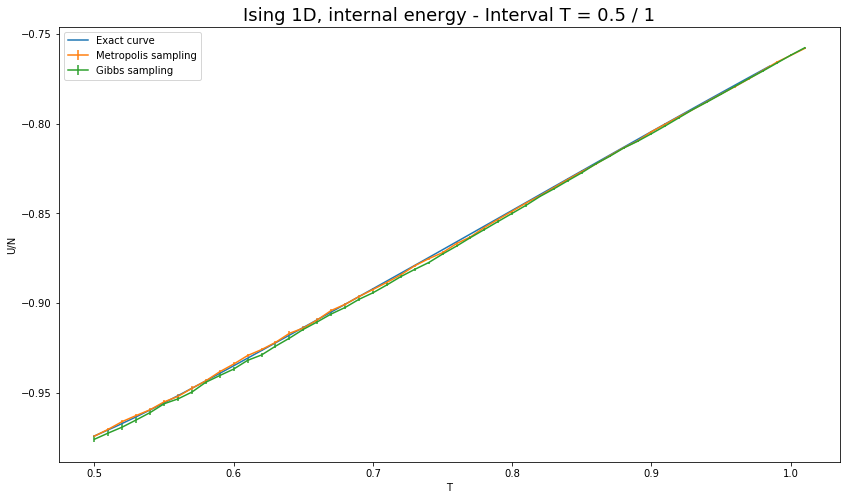

In [3]:
fig=plt.figure(figsize=(14, 8))
plt.plot(T[:33], e[:33], label="Exact curve")
plt.errorbar(temp_met[:52],intern_energy_met[:52],yerr=err_energy_met[:52], label="Metropolis sampling")
plt.errorbar(temp_gib[:52],intern_energy_gib[:52],yerr=err_energy_gib[:52], label="Gibbs sampling")
plt.title('Ising 1D, internal energy - Interval T = 0.5 / 1', fontsize=18)
plt.legend()
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

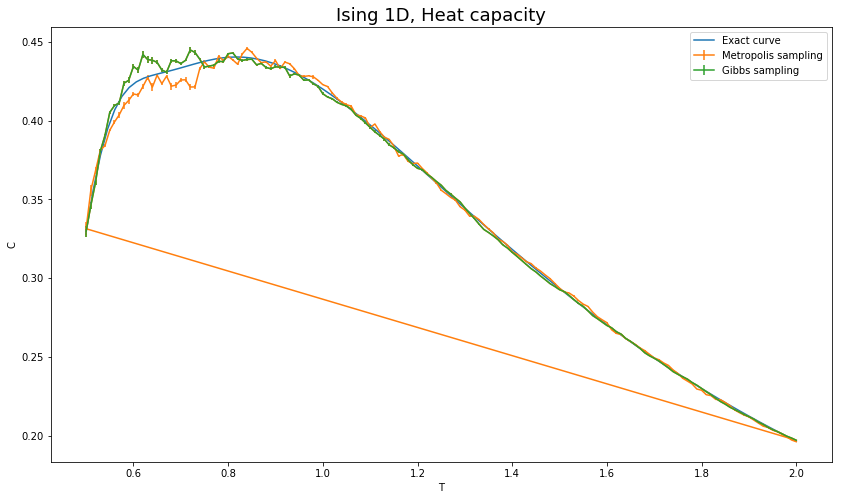

In [10]:
temp_met, heat_cap_met, err_heat_met = np.loadtxt("./ISING_1D/T-C_0_met.dat", usecols=(0,1,2), unpack='true')    
temp_gib, heat_cap_gib, err_heat_gib = np.loadtxt("./ISING_1D/T-C_0_gib.dat", usecols=(0,1,2), unpack='true')    


fig=plt.figure(figsize=(14, 8))
plt.plot(T, heat, label="Exact curve")
plt.errorbar(temp_met,heat_cap_met, err_heat_met, label="Metropolis sampling")
plt.errorbar(temp_gib,heat_cap_gib, err_heat_gib, label="Gibbs sampling")
plt.title('Ising 1D, Heat capacity', fontsize=18)
plt.legend()
plt.xlabel('T')
plt.ylabel('C')
plt.show()

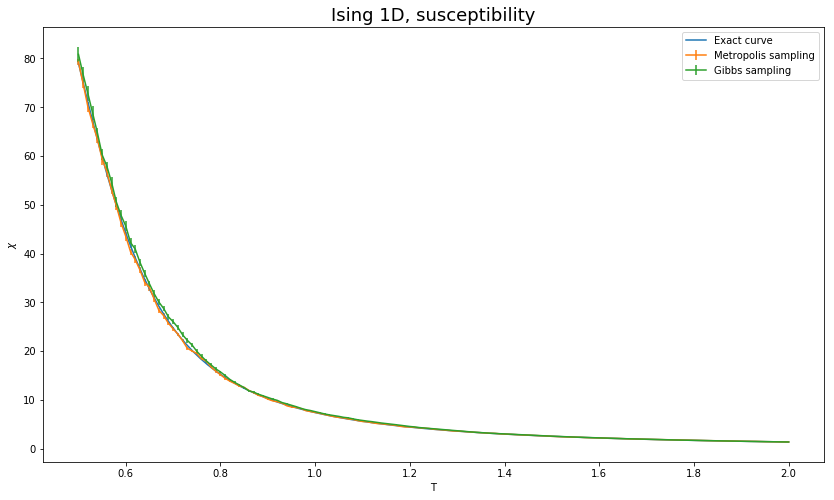

In [5]:
temp_met, susc_met, err_susc_met = np.loadtxt("./ISING_1D/T-X_0_met.dat", usecols=(0,1,2), unpack='true')    
temp_gib, susc_gib, err_susc_gib = np.loadtxt("./ISING_1D/T-X_0_gib.dat", usecols=(0,1,2), unpack='true')    

fig=plt.figure(figsize=(14, 8))
plt.plot(T, X, label="Exact curve")
plt.errorbar(temp_met,susc_met, err_susc_met, label="Metropolis sampling")
plt.errorbar(temp_gib,susc_gib, err_susc_gib, label="Gibbs sampling")
plt.title('Ising 1D, susceptibility',fontsize=18)
plt.legend()
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

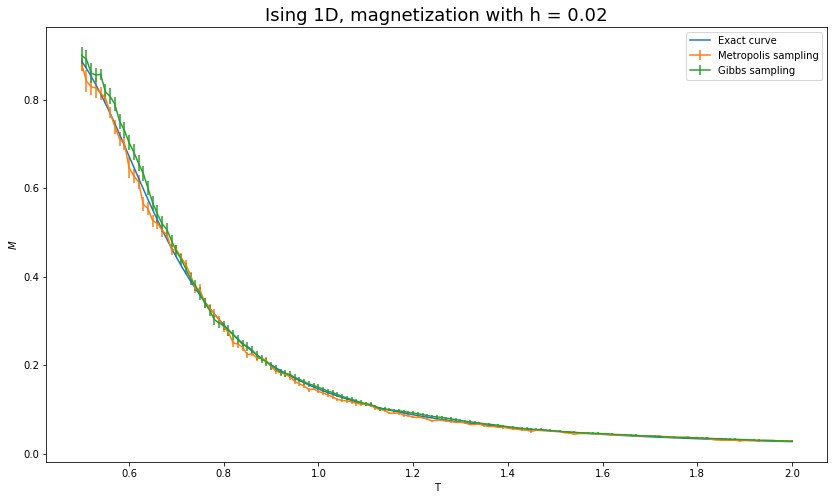

In [6]:
temp_met, magn_met, err_magn_met = np.loadtxt("./ISING_1D/T-M_0.2_met.dat", usecols=(0,1,2), unpack='true')    
temp_gib, magn_gib, err_magn_gib = np.loadtxt("./ISING_1D/T-M_0.2_gib.dat", usecols=(0,1,2), unpack='true')

fig=plt.figure(figsize=(14, 8))
plt.plot(T, M, label="Exact curve")
plt.errorbar(temp_met,magn_met, err_magn_met, label="Metropolis sampling")
plt.errorbar(temp_gib,magn_gib, err_magn_gib, label="Gibbs sampling")
plt.title('Ising 1D, magnetization with h = 0.02',fontsize=18)
plt.legend()
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

### Conclusions

The numerical prediction for the former four physical quantities are almost always in good accord with the respective theoretical predictions.

There are a few exceptions altough. The Gibbs-sampling curve for the internal energy, the magnetization  and the susceptibility at temperature $T\approx 0.5$ does not have a good overlap with the theoretical prediction, indicating that our sampling methods become more and more inefficient while getting closer to the $T\to 0$ limit (this is perfectly understandable, at very low temperature the system tends to be frozen in some configuration and, being a Monte Carlo step the trying to flip one time all the spins of the system, it is possible that in a Monte Carlo step very few moves are accepted at small $T$, so the system becomes less and less ergodic).

The heat capacity is worse, under $T=0.8$ the agreement with the exact curve becomes quite bad.